# Global Terrorist Attacks

A Journey towards understanding the [Global Terrorism Database](https://www.start.umd.edu/gtd/). This report walks us through a visual understanding of the dataset and the growth of terrorist activities from 1970-2017. And try to answer some interesting questions like *Why is there a sudden increase in terrorist activities? Which country has more terrorist activities? etc.*

### Author: Harish Gandhi Ramachandran

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [19]:
#import packages
import warnings
warnings.filterwarnings('ignore')

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score



## Exploratory Data Analysis

Data is available from 1970 to 2017 except the 1993 data(which is available seperately). So we need to merge it into a single dataset. The dataset itself is huge .csv file containing 18,000 rows and 135 columns.

In [3]:
df = pd.read_excel('./GTD_0718dist/globalterrorismdb_0718dist.xlsx')
df_1993= pd.read_excel('./GTD_0718dist/gtd1993_0718dist.xlsx')
all_year_df = pd.concat([df, df_1993],ignore_index=True)

### What does our dataself look like?

Top 5 rows from the dataset. To know more about what each column represents: have a look at the [codebook](https://www.start.umd.edu/gtd/downloads/Codebook.pdf).

In [4]:
all_year_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Frequency of Terrorist Activities with Trend Chart

In [5]:
def label_percent(feature):
    percent = []
    total_items = sum(all_year_df[feature].value_counts())
    for each_value in all_year_df[feature].value_counts():
        percent.append(round(100*each_value / total_items,2))
    
    return percent

In [6]:
df_usa = all_year_df[all_year_df['country'] == 217]#usa country code

In [7]:
# terrorist attacks by year
worldterror_peryear = np.asarray(all_year_df.groupby('iyear').iyear.count())
usaterror_peryear = np.asarray(df_usa.groupby('iyear').iyear.count())

terror_years = np.arange(1970, 2018)

trace1 = go.Scatter(
         x = terror_years,
         y = worldterror_peryear,
        name = 'World',
         mode = 'lines',
         line = dict(
             color = 'rgb(200,0,0)',
             width = 3),
                opacity = 0.8
         )

trace2 = go.Scatter(
         x = terror_years,
         y = usaterror_peryear,
    name='USA',
         mode = 'lines',
         line = dict(
             color = 'rgb(0,200,0)',
             width = 3),
                opacity = 0.8
         )

layout = go.Layout(
         title = 'Terrorist Attacks by Year in the world vs USA',
        titlefont = dict(size = 25),
         xaxis = dict(title='Year',
             rangeslider = dict(thickness = 0.05),
             showline = True,
             showgrid = False
         ),
         yaxis = dict(title='Number of Occurences',
             showline = True,
             showgrid = False)
         )

data = [trace1,trace2]
figure = dict(data = data, layout = layout)
iplot(figure)

Note: Use your cursor to slide over the trend line to zoom on the year range.




**Inference:** The Terrorist activities has seen an increase in the 21th century.But **why is there a plunge after 2004?** 

There might be two possible reasons:
1. Hypothesis 1: The data collected in the 21th century is high - *Highly Unlikely explanation! Because the data collection procedure mentioned in the [codebook](https://www.start.umd.edu/gtd/using-gtd/) indicates the all the data collected is from the publicly available information*
2. Hypothesis 2: Some kind war/terrorist activity started to evolve - *May be! Let's dive in to explore more.*

### Let us explore the motive behind all these attacks:

We will aggregate all the rows of the *motive* column in our database to form a generic understanding of the slang. Them *motive* column itself is as text category, containing a textual representation of the attacks motive.


In [8]:
# words_string = nltk.word_tokenize(all_year_df.summary)
tuples = [tuple(str(x)) for x in all_year_df.summary.value_counts().reset_index().values]

In [9]:
motive=all_year_df.motive.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(motive)

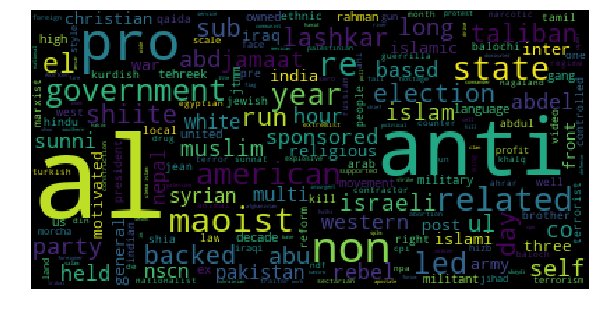

In [10]:

from wordcloud import WordCloud, STOPWORDS
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axis('off')
plt.show()

Note: The motive column of the dataset is created only after 1997, thus all the attack motives are after 1997.

**Inference**: The wordcloud above, shows the frequency of words used in the motive section of the dataset. The bigger the word, the more frequent it occurs. It can be seen that **al(for al-kaeda), pro, anti** are highly frequent words. It suggests that terrorist activities have some motive related to the **government actions**.

## Terrorist activities across regions and countries

Let's check which regions contribute to higher terrorist attack counts.

In [11]:
trace = go.Bar(
            x = [i for i in all_year_df.region_txt.value_counts().index],
            y = all_year_df.region_txt.value_counts(), text= label_percent(feature='region_txt'))
layout = go.Layout(title = "Terrorist Activities across Regions",
                   titlefont = dict(size = 25),
                   xaxis = dict(title='Region',dtick=1),
                   yaxis = dict(title='Number of Occurences'),
                   
                  font=dict(size=12))
data = [trace]
fig = dict(data=data, layout = layout)
iplot(fig, filename="terrorregion_bar")


**Inference**: Almost 50% of the attacks are from Middle East&North Africa and the South Asia regions.

In [12]:
#Countries with country code, used for plotting in the map
countries={'Afghanistan':'AFG',
'Aland Islands':'ALA','Albania':'ALB','Algeria':'DZA','American Samoa':'ASM','Andorra':'AND','Angola':'AGO','Anguilla':'AIA','Antigua and Barbuda':'ATG',
'Antarctica':'ATA','Argentina':'ARG','Armenia':'ARM','Aruba':'ABW','Australia':'AUS','Austria':'AUT','Azerbaijan':'AZE','Azerbaidjan':'AZE',
'Bahrain':'BHR','Bahamas':'BHS','Bangladesh':'BGD','Barbados':'BRB','Belarus':'BLR',
'Belgium':'BEL','Belize':'BLZ','Benin':'BEN','Bermuda':'BMU','Bhutan':'BTN','Bolivia':'BOL','Bosnia and Herzegovina':'BIH','Bosnia-Herzegovina':'BIH',
'Botswana':'BWA','Bouvet Island':'BVT','Brazil':'BRA','British Virgin Islands':'VGB','British Indian Ocean Territory':'IOT',
'Brunei':'BRN','Brunei Darussalam':'BRN','Bulgaria':'BGR','Burkina Faso':'BFA','Burma':'MMR',
'Burundi':'BDI','Cabo Verde':'CPV','Cape Verde':'CPV','Cambodia':'KHM','Cameroon':'CMR',
'Canada':'CAN','Cayman Islands':'CYM','Central African Republic':'CAF','Chad':'TCD','Chile':'CHL',
'Christmas Island':'CHR','China':'CHN','Colombia':'COL','Comoros':'COM','Congo, Democratic Republic of the':'COD',
'Congo, Republic of the':'COG','Cook Islands':'COK','Costa Rica':'CRI','Cote d\'Ivoire':'CIV',
"Ivory Coast (Cote D'Ivoire)":'CIV','Croatia':'HRV','Cuba':'CUB','Curacao':'CUW','Cyprus':'CYP',
'Czech Republic':'CZE','Denmark':'DNK','Djibouti':'DJI','Dominica':'DMA','Dominican Republic':'DOM',
'Ecuador':'ECU','Egypt':'EGY','El Salvador':'SLV','Equatorial Guinea':'GNQ','Eritrea':'ERI','Estonia':'EST',
'Ethiopia':'ETH','Falkland Islands (Islas Malvinas)':'FLK','Falkland Islands':'FLK','Faroe Islands':'FRO',
'Fiji':'FJI','Finland':'FIN','France':'FRA','French Polynesia':'PYF','Gabon':'GAB',
'Gambia, The':'GMB','Georgia':'GEO','Germany':'DEU','Ghana':'GHA','Gibraltar':'GIB',
'Greece':'GRC','Greenland':'GRL','Grenada':'GRD','Guam':'GUM','Guatemala':'GTM',
'Guernsey':'GGY','Guinea-Bissau':'GNB','Guinea':'GIN','Guyana':'GUY','French Guyana':'GUY','Haiti':'HTI',
'Honduras':'HND','Heard and McDonald Islands':'HMD','Hong Kong':'HKG','Hungary':'HUN','Iceland':'ISL',
'India':'IND','Indonesia':'IDN','Iran':'IRN','Iraq':'IRQ','Ireland':'IRL','Isle of Man':'IMN',
'Israel':'ISR','Italy':'ITA','Jamaica':'JAM','Japan':'JPN','Jersey':'JEY','Jordan':'JOR',
'Kazakhstan':'KAZ','Kenya':'KEN','Kiribati':'KIR','Korea, North':'KOR','Korea, South':'PRK',
'South Korea':'PRK','North Korea':'KOR','Kosovo':'KSV','Kuwait':'KWT','Kyrgyzstan':'KGZ',
'Laos':'LAO','Latvia':'LVA','Lebanon':'LBN','Lesotho':'LSO','Liberia':'LBR','Libya':'LBY','Liechtenstein':'LIE',
'Lithuania':'LTU','Luxembourg':'LUX','Macau':'MAC','Macedonia':'MKD','Madagascar':'MDG',
'Malawi':'MWI','Malaysia':'MYS','Maldives':'MDV','Mali':'MLI','Malta':'MLT','Marshall Islands':'MHL',
'Martinique (French)':'MTQ','Mauritania':'MRT','Mauritius':'MUS','Mexico':'MEX','Micronesia, Federated States of':'FSM',
'Moldova':'MDA','Moldavia':'MDA','Monaco':'MCO','Mongolia':'MNG','Montenegro':'MNE','Montserrat':'MSR',
'Morocco':'MAR','Mozambique':'MOZ','Myanmar':'MMR','Namibia':'NAM','Nepal':'NPL','Netherlands':'NLD',
'Netherlands Antilles':'ANT','New Caledonia':'NCL','New Caledonia (French)':'NCL','New Zealand':'NZL','Nicaragua':'NIC',
'Nigeria':'NGA','Niger':'NER','Niue':'NIU','Northern Mariana Islands':'MNP','Norway':'NOR','Oman':'OMN',
'Pakistan':'PAK','Palau':'PLW','Panama':'PAN','Papua New Guinea':'PNG','Paraguay':'PRY','Peru':'PER',
'Philippines':'PHL','Pitcairn Island':'PCN','Poland':'POL','Polynesia (French)':'PYF','Portugal':'PRT',
'Puerto Rico':'PRI','Qatar':'QAT','Reunion (French)':'REU','Romania':'ROU','Russia':'RUS','Russian Federation':'RUS',
'Rwanda':'RWA','Saint Kitts and Nevis':'KNA','Saint Lucia':'LCA','Saint Martin':'MAF','Saint Pierre and Miquelon':'SPM',
'Saint Vincent and the Grenadines':'VCT','Saint Vincent & Grenadines':'VCT','S. Georgia & S. Sandwich Isls.':'SGS','Samoa':'WSM',
'San Marino':'SMR','Saint Helena':'SHN','Sao Tome and Principe':'STP','Saudi Arabia':'SAU','Senegal':'SEN',
'Serbia':'SRB','Seychelles':'SYC','Sierra Leone':'SLE','Singapore':'SGP','Sint Maarten':'SXM',
'Slovakia':'SVK','Slovak Republic':'SVK','Slovenia':'SVN','Solomon Islands':'SLB','Somalia':'SOM','South Africa':'ZAF',
'South Sudan':'SSD','Spain':'ESP','Sri Lanka':'LKA','Sudan':'SDN','Suriname':'SUR',
'Swaziland':'SWZ','Sweden':'SWE','Switzerland':'CHE','Syria':'SYR','Taiwan':'TWN','Tajikistan':'TJK',
'Tadjikistan':'TJK','Tanzania':'TZA','Thailand':'THA','Timor-Leste':'TLS','Togo':'TGO','Tonga':'TON',
'Trinidad and Tobago':'TTO','Tunisia':'TUN','Turkey':'TUR','Turkmenistan':'TKM','Tuvalu':'TUV',
'Uganda':'UGA','Ukraine':'UKR','United Arab Emirates':'ARE','United Kingdom':'GBR','United States':'USA',
'U.S. Minor Outlying Islands':'UMI','Uruguay':'URY','Uzbekistan':'UZB','Vanuatu':'VUT',
'Vatican City State':'VAT','Venezuela':'VEN','Vietnam':'VNM','Virgin Islands':'VGB',
'Virgin Islands (USA)':'VIR','Virgin Islands (British)':'VGB','West Bank':'WBG','Yemen':'YEM',
'Zaire':'ZAR','Zambia':'ZMB','Zimbabwe':'ZWE',
 'Yugoslavia':'CZE', 'Czechoslovakia':'CZE','Democratic Republic of the Congo':'COD',
'East Germany (GDR)': 'DEU','West Germany (FRG)': 'DEU',
 'East Timor':'TLS',
 'French Guiana':'GUF',
 'Gambia':'GMB',
 'Guadeloupe':'GLP',
 'Ivory Coast':'CIV',
 'Martinique':'MTQ',
 'New Hebrides':'IRL',
 'North Yemen':'YEM',
 "People's Republic of the Congo":'COG',
 'Republic of the Congo':'COD',
 'Rhodesia':'ZWE',
 'Serbia-Montenegro':'SRB',
 'South Vietnam':'VNM',
 'South Yemen':'YEM',
 'Soviet Union':'RUS',
 'St. Kitts and Nevis':'KNA',
 'St. Lucia':'LCA',
 'Vatican City':'ITA',
 'Wallis and Futuna':'WLF',
 'West Bank and Gaza Strip':'GZ',
 'Western Sahara':'ESH'}

In [13]:
codes = [countries[country] if country in countries else 0 for country in all_year_df.country_txt]
all_year_df['codes'] =codes

In [14]:
data = [ dict(
        type = 'choropleth',
        locations = all_year_df.codes.value_counts().index,
        z = all_year_df.codes.value_counts(),
        text = all_year_df.codes.value_counts().index,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
    autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Scale of Attacks'),
      ) ]

layout = dict(
    title = '1970-2017 Global Terrorism map',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

**Inference**: Iraq, Pakistan, Afghanistan and India are some countries which contribute more to the terrorist activities.

Now let's concentrate on Iraq! **Why does Iraq has major terrorist activities? Was Iraq a birth place for terrorism?** **When did it all start? And why(hard to answer objectively)**?

## Is Iraq a birth place of terrorism?



In [15]:
df_iraq = all_year_df[all_year_df['country'] == 95]#Iraq country code

In [16]:

trace = go.Bar(
            x = [i for i in df_iraq.iyear.value_counts().index],
            y = df_iraq.iyear.value_counts())
layout = go.Layout(title = "Number of Terrorist Activities in Iraq",
                   titlefont = dict(size = 25),
                   xaxis = dict(title='Year',dtick=1),
                   yaxis = dict(title='Number of Occurences'),
                   
                  font=dict(size=12))
data = [trace]
fig = dict(data=data, layout = layout)
iplot(fig, filename="terrorIraq_barchart")


**Inference**: NO! Although Iraq is the major contributor to global terrorist activities, it only started from the year 2004. This is mainly because of the [Iraq war](https://en.wikipedia.org/wiki/Iraq_War)! 

Now this gets us back to our previous question? 

**Why is there a plunge after 2004?** - Due to Iraq War(ie Hypothesis2: there is a increase in terrorist activities in the 21 century is due to a WAR!).

In [17]:
# ## Let's Concentrate on USA

# The terrorist activities in USA is 2872, which is comparatively less than the activities across eastern regions of the world. However, we will explore the states and identify the causalities!

# all_year_df['iday'][all_year_df.iday == 0] = 1
# all_year_df['imonth'][all_year_df.imonth == 0] = 1
# k= all_year_df[['iday', 'imonth', 'iyear']]
# k.rename(columns={'iyear':'YEAR','imonth':'MONTH', 'iday':'DAY'}, inplace=True)
# all_year_df['date'] = pd.to_datetime(k)

In [18]:

# all_year_df['text'] = all_year_df['date'].dt.strftime('%B %-d, %Y') + '<br>' +\
#                      all_year_df['nkill'].astype(str) + ' Killed, ' +\
#                      all_year_df['nwound'].astype(str) + ' Injured'

# fatality = dict(
#            type = 'scattergeo',
#            locationmode = 'USA-states',
#            lon = all_year_df[all_year_df.nkill > 0]['longitude'],
#            lat = all_year_df[all_year_df.nkill > 0]['latitude'],
#            text = all_year_df[all_year_df.nkill > 0]['text'],
#            mode = 'markers',
#            name = 'Fatalities',
#            hoverinfo = 'text+name',
#            marker = dict(
#                size = all_year_df[all_year_df.nkill > 0]['nkill'] ** 0.255 * 8,
#                opacity = 0.95,
#                color = 'rgb(240, 140, 45)')
#            )
        
# injury = dict(
#          type = 'scattergeo',
#          locationmode = 'USA-states',
#          lon = all_year_df[all_year_df.nkill == 0]['longitude'],
#          lat = all_year_df[all_year_df.nkill == 0]['latitude'],
#          text = all_year_df[all_year_df.nkill == 0]['text'],
#          mode = 'markers',
#          name = 'Injuries',
#          hoverinfo = 'text+name',
#          marker = dict(
#              size = (all_year_df[all_year_df.nkill == 0]['nwound'] + 1) ** 0.245 * 8,
#              opacity = 0.85,
#              color = 'rgb(20, 150, 187)')
#          )

# layout = dict(
#          title = 'Terrorist Attacks by Latitude/Longitude in United States (1970-2015)',
#          showlegend = True,
#          legend = dict(
#              x = 0.85, y = 0.4
#          ),
#          geo = dict(
#              scope = 'usa',
#              projection = dict(type = 'albers usa'),
#              showland = True,
#              landcolor = 'rgb(250, 250, 250)',
#              subunitwidth = 1,
#              subunitcolor = 'rgb(217, 217, 217)',
#              countrywidth = 1,
#              countrycolor = 'rgb(217, 217, 217)',
#              showlakes = True,
#              lakecolor = 'rgb(255, 255, 255)')
#          )

# data = [fatality, injury]
# figure = dict(data = data, layout = layout)
# iplot(figure)

# # Here the chart shows the location of the attack. It is divided into 2 categories:
# #   1. **Fatalities**: Number of people got killed
# #   2. **Injuries**: Number of people who got wounded

# # The bigger the circle, the greater the causalities.